# Wine-Quality-Prediction

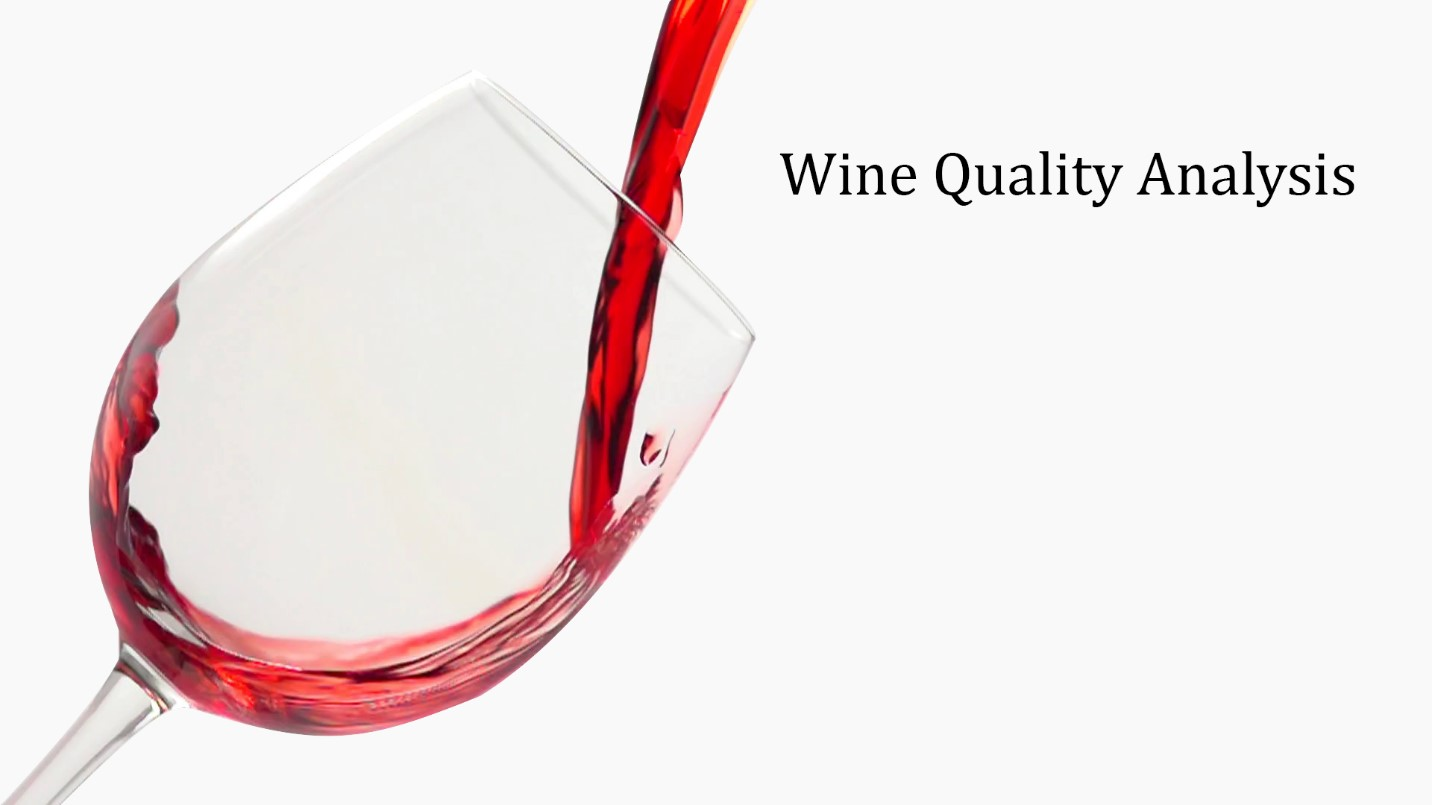

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df = pd.read_csv("Dataset/wine.csv")

In [10]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

df.head()

In [5]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

# Basic Information of Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.shape

(1599, 12)

In [7]:
df.size

19188

In [9]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Check for Null Values and Duplicated Values**

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.duplicated().sum()

240

In [5]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().sum()

0

# Data Visualization

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

**PairPlot**

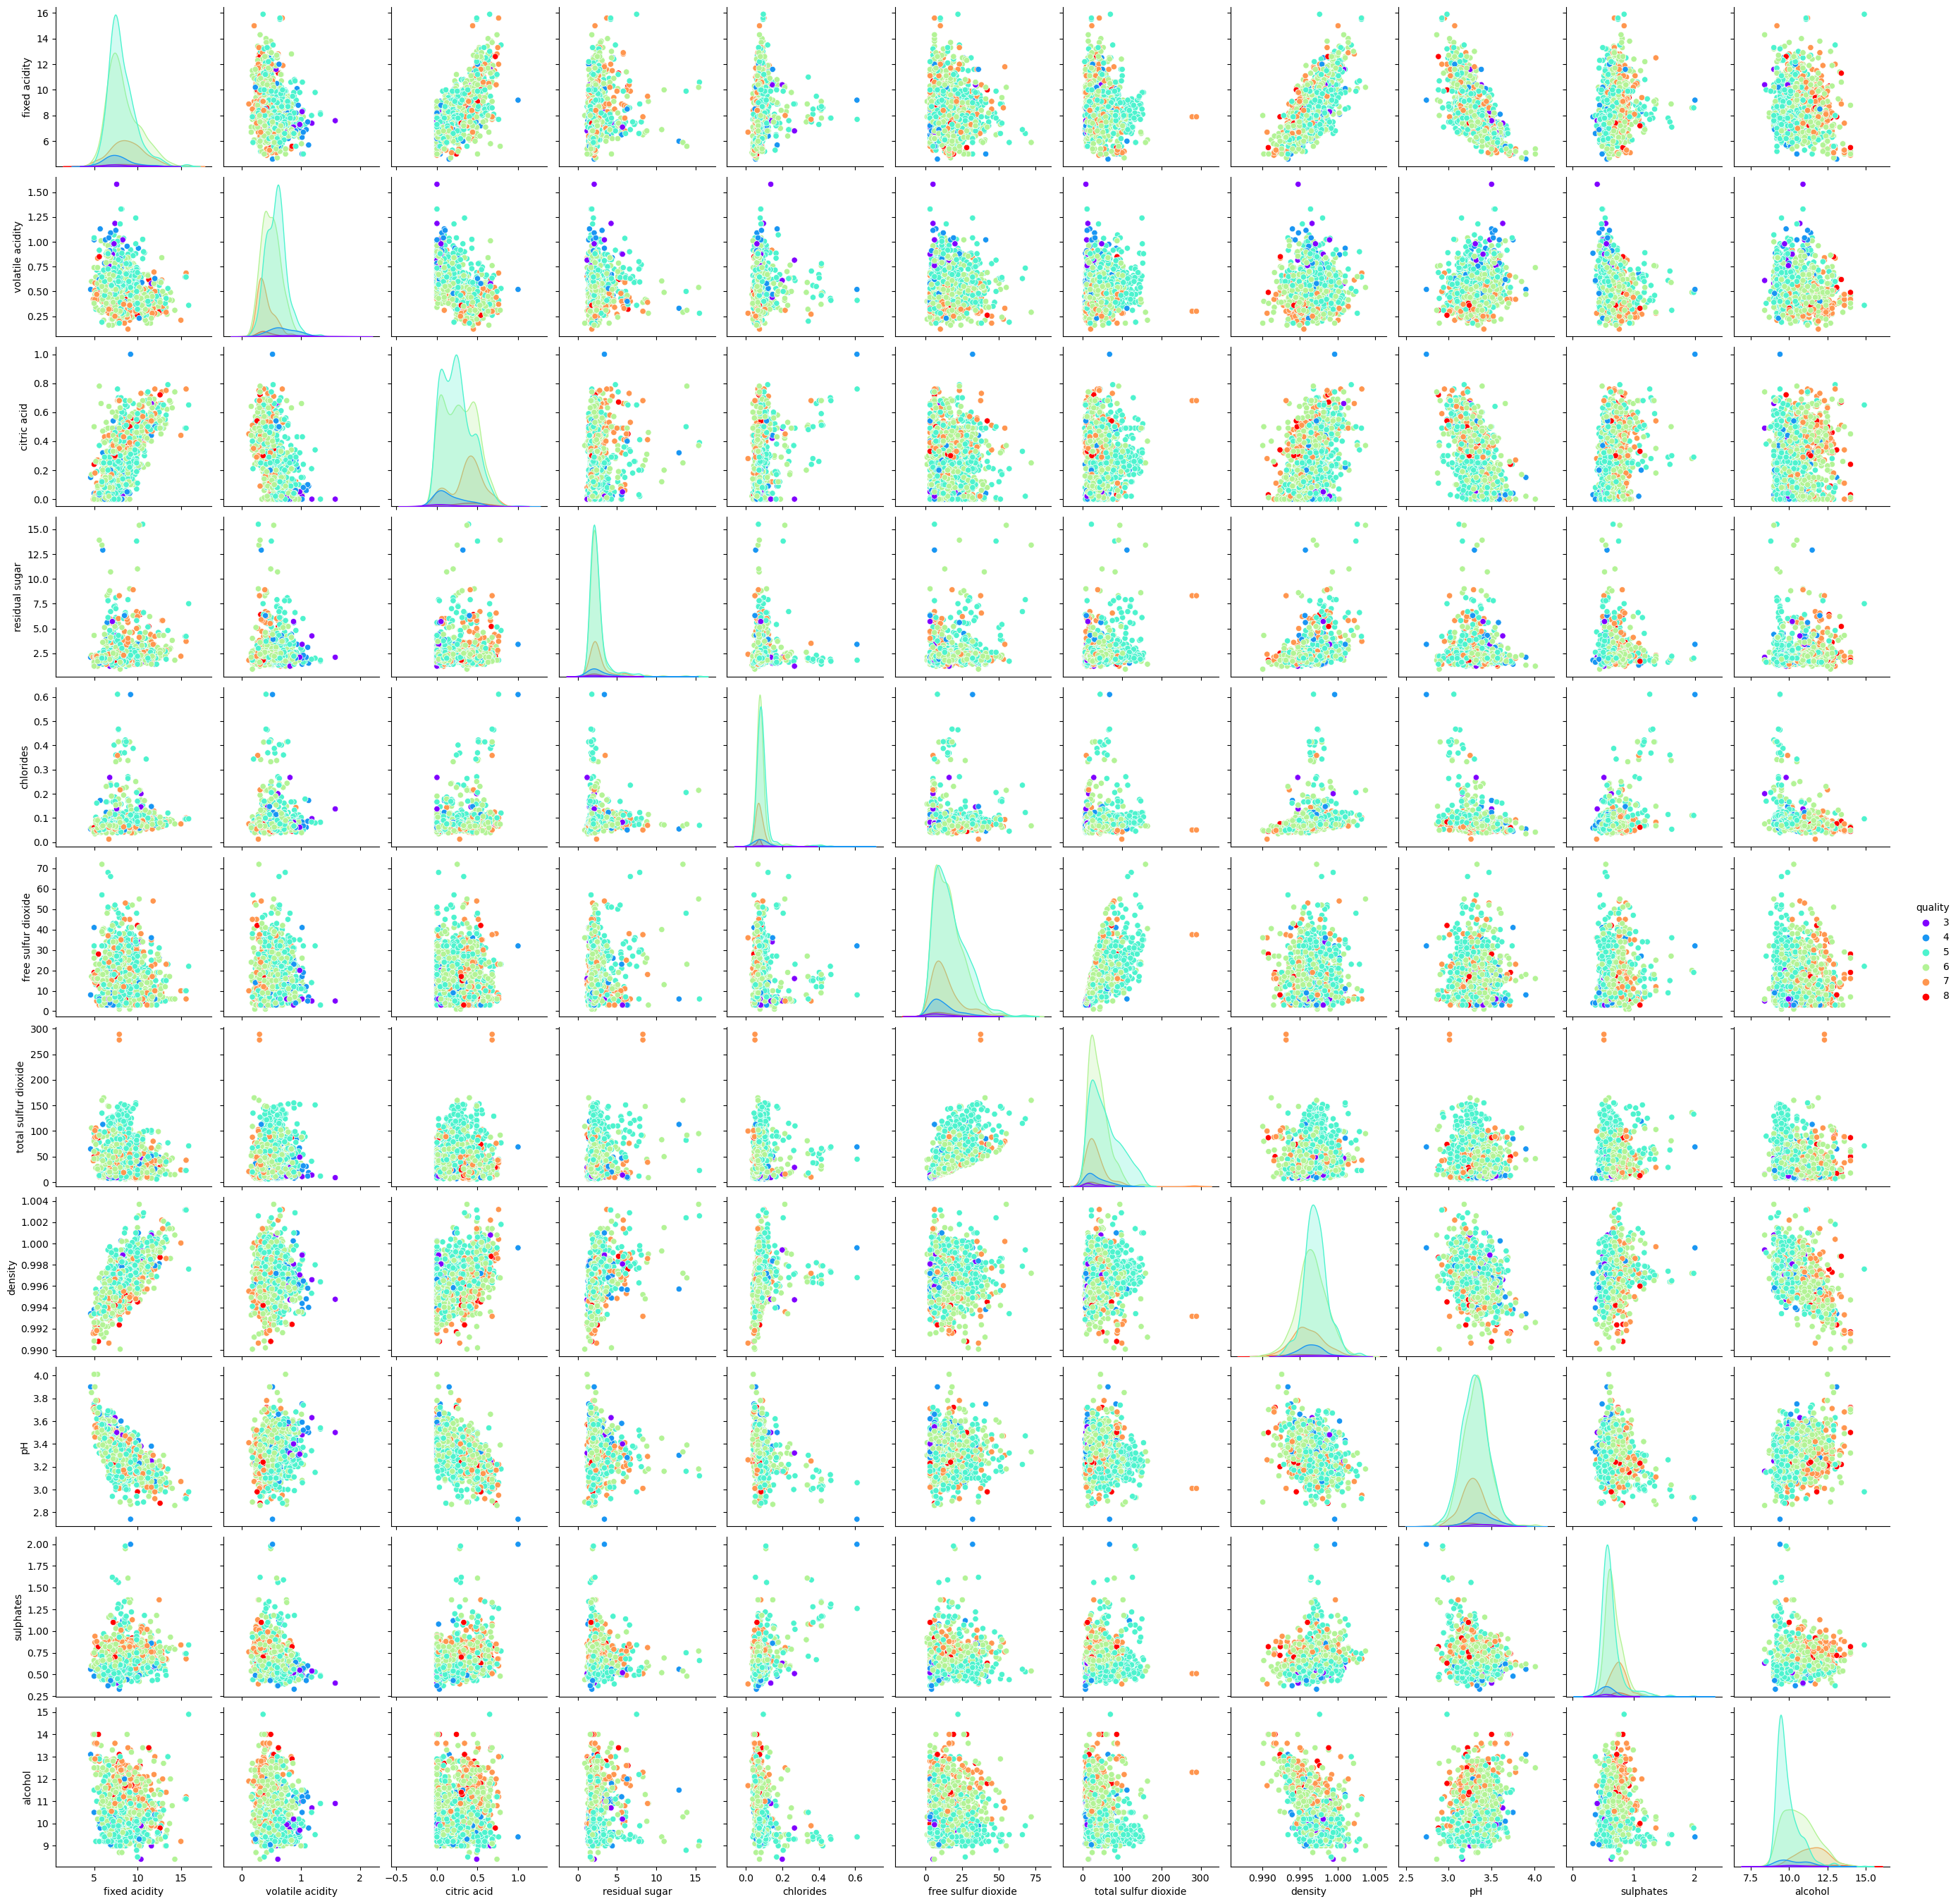

In [7]:
sns.pairplot(df, hue = 'quality', palette= 'rainbow')

**HeatMap**

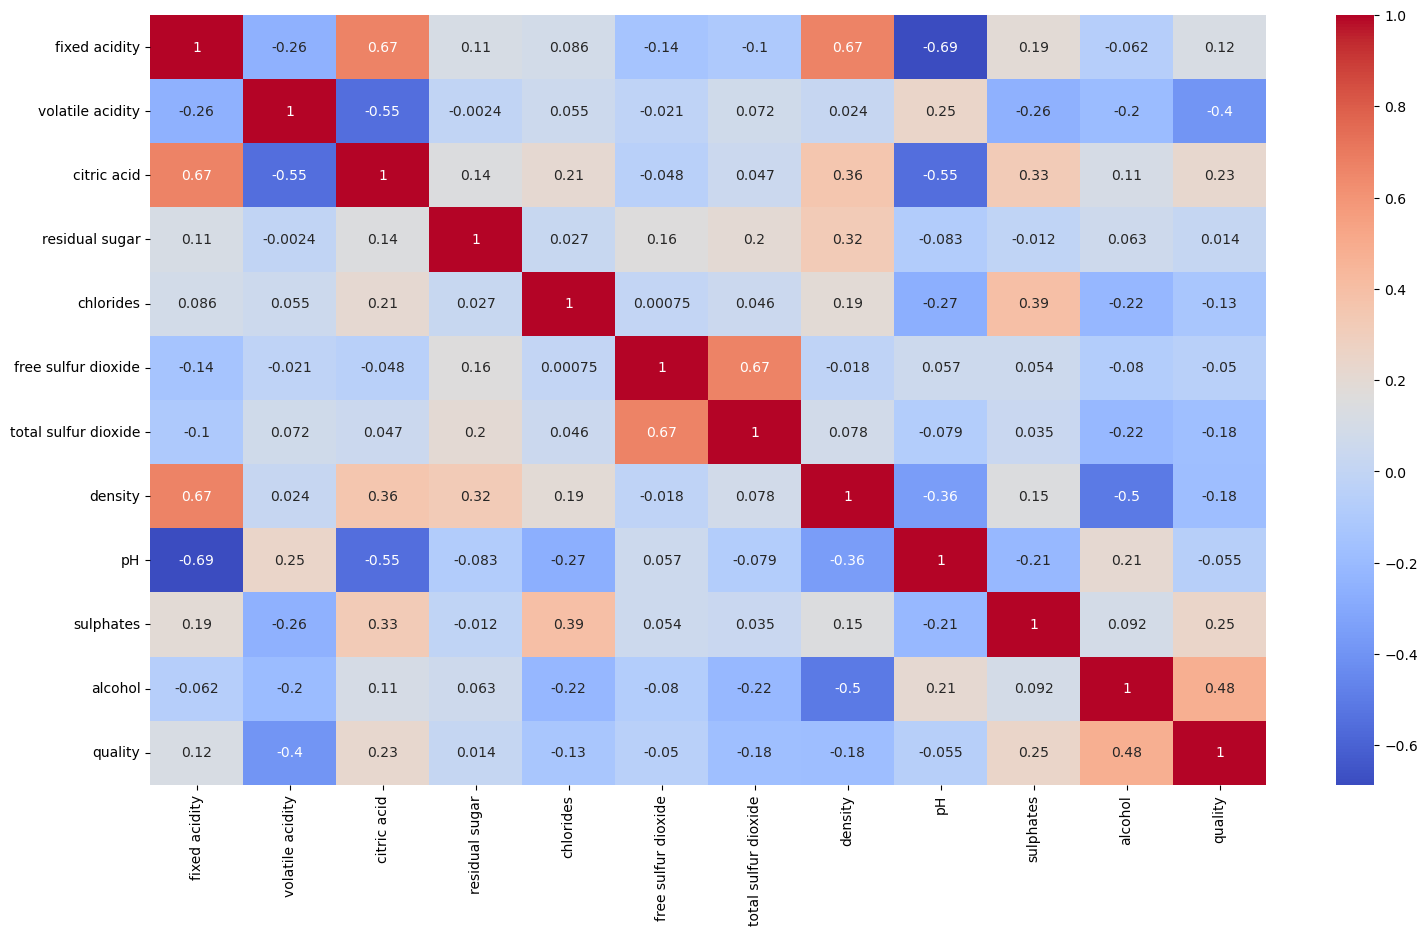

In [8]:
pt.figure(figsize=(18,10))
sb.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
pt.show()

**Histogram**

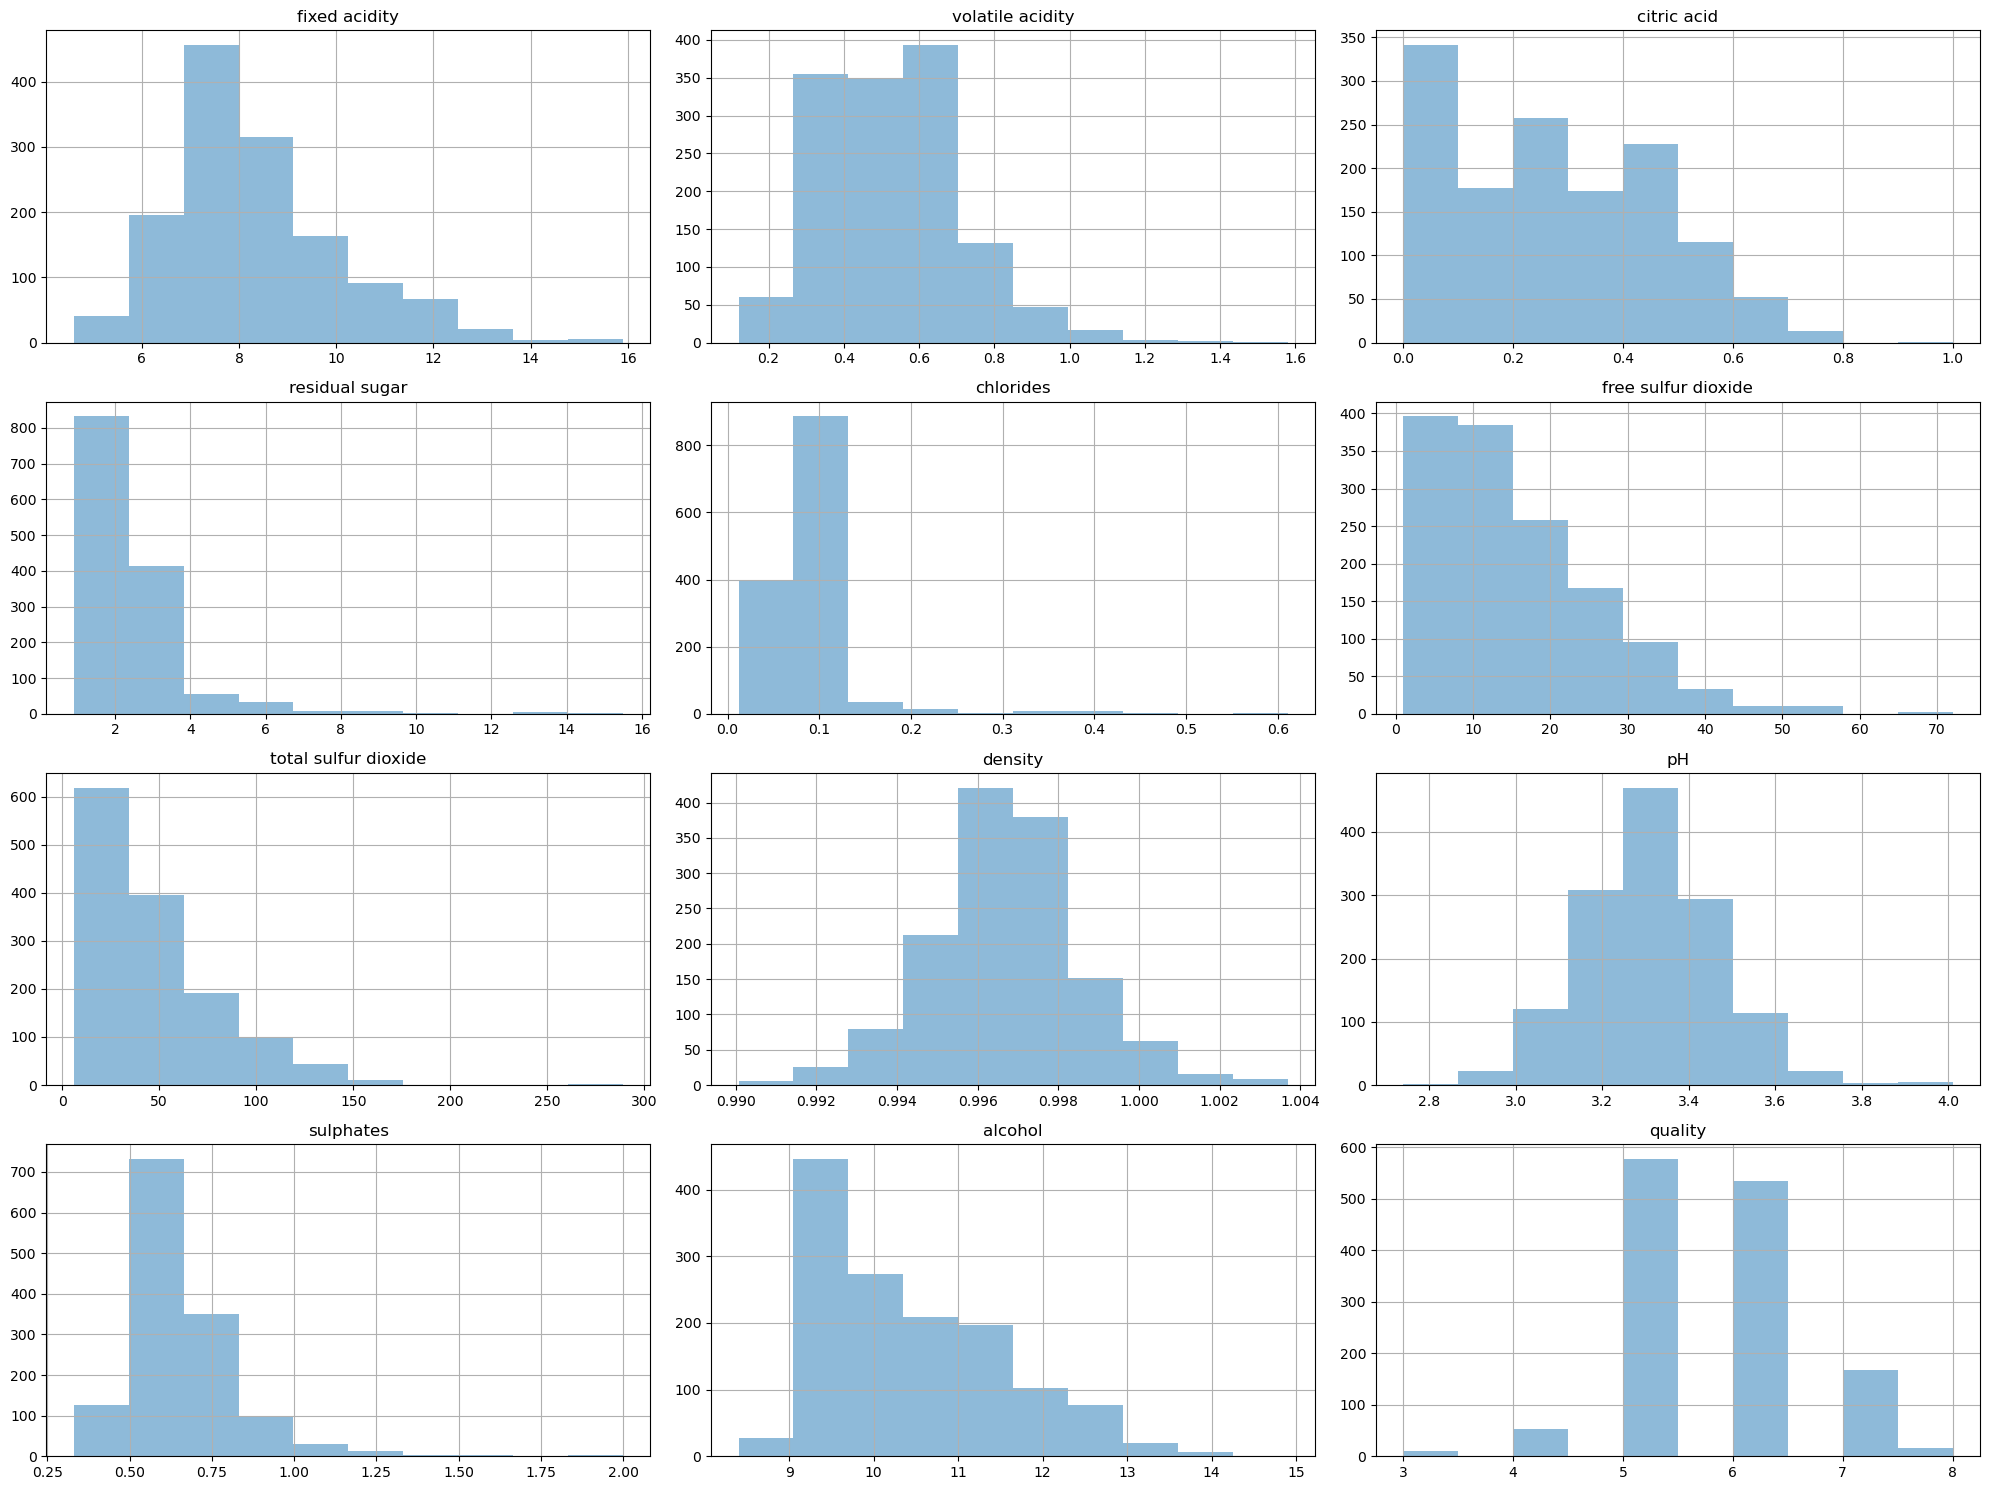

In [9]:
import matplotlib.pyplot as plt
df.hist(alpha=0.5, figsize=(20, 15))
plt.tight_layout()
plt.show()

**Scatterplot**

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='chlorides', ylabel='alcohol'>

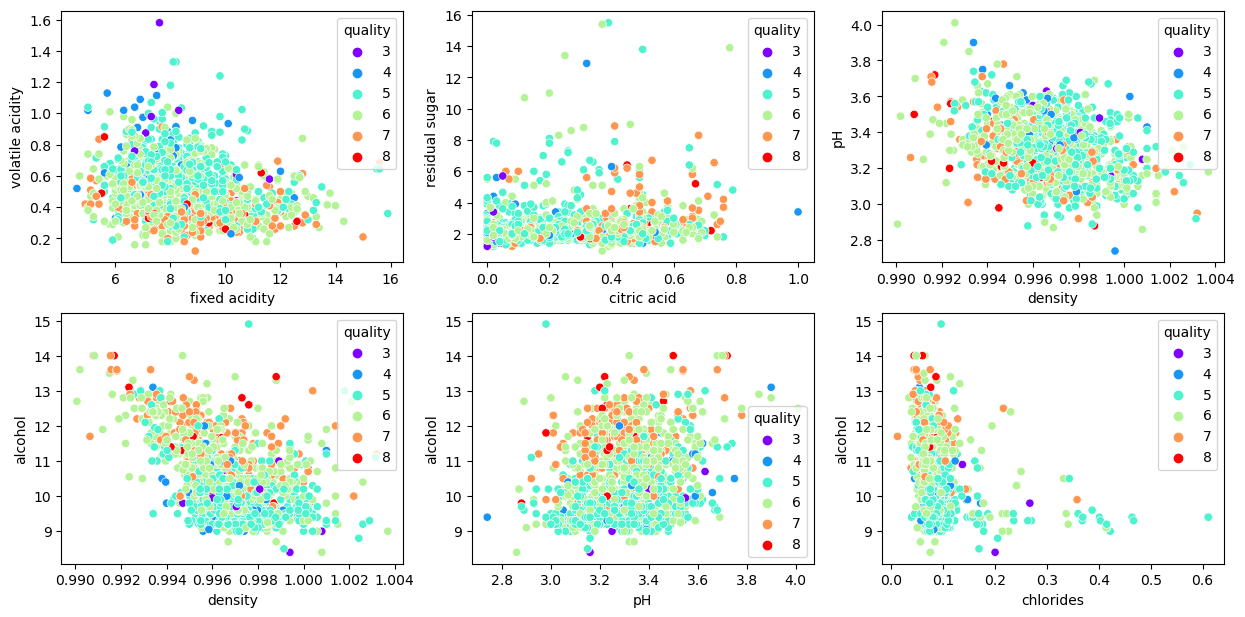

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
# plotting a scatterplot using seaborn 
sns.scatterplot(data=df, x='fixed acidity', 
                y='volatile acidity', hue='quality', palette='rainbow') 
plt.subplot(4,3,2)
sns.scatterplot(data=df, x='citric acid', 
                y='residual sugar', hue='quality', palette='rainbow') 
plt.subplot(4,3,3)
sns.scatterplot(data=df, x='density', 
                y='pH', hue='quality', palette='rainbow') 

plt.subplot(4,3,4)
sns.scatterplot(data=df, x='density', 
                y='alcohol', hue='quality', palette='rainbow') 
plt.subplot(4,3,5)
sns.scatterplot(data=df, x='pH', 
                y='alcohol', hue='quality', palette='rainbow')
plt.subplot(4,3,6)
sns.scatterplot(data=df, x='chlorides', 
                y='alcohol', hue='quality', palette='rainbow')

**BarPlot**

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='quality', ylabel='alcohol'>

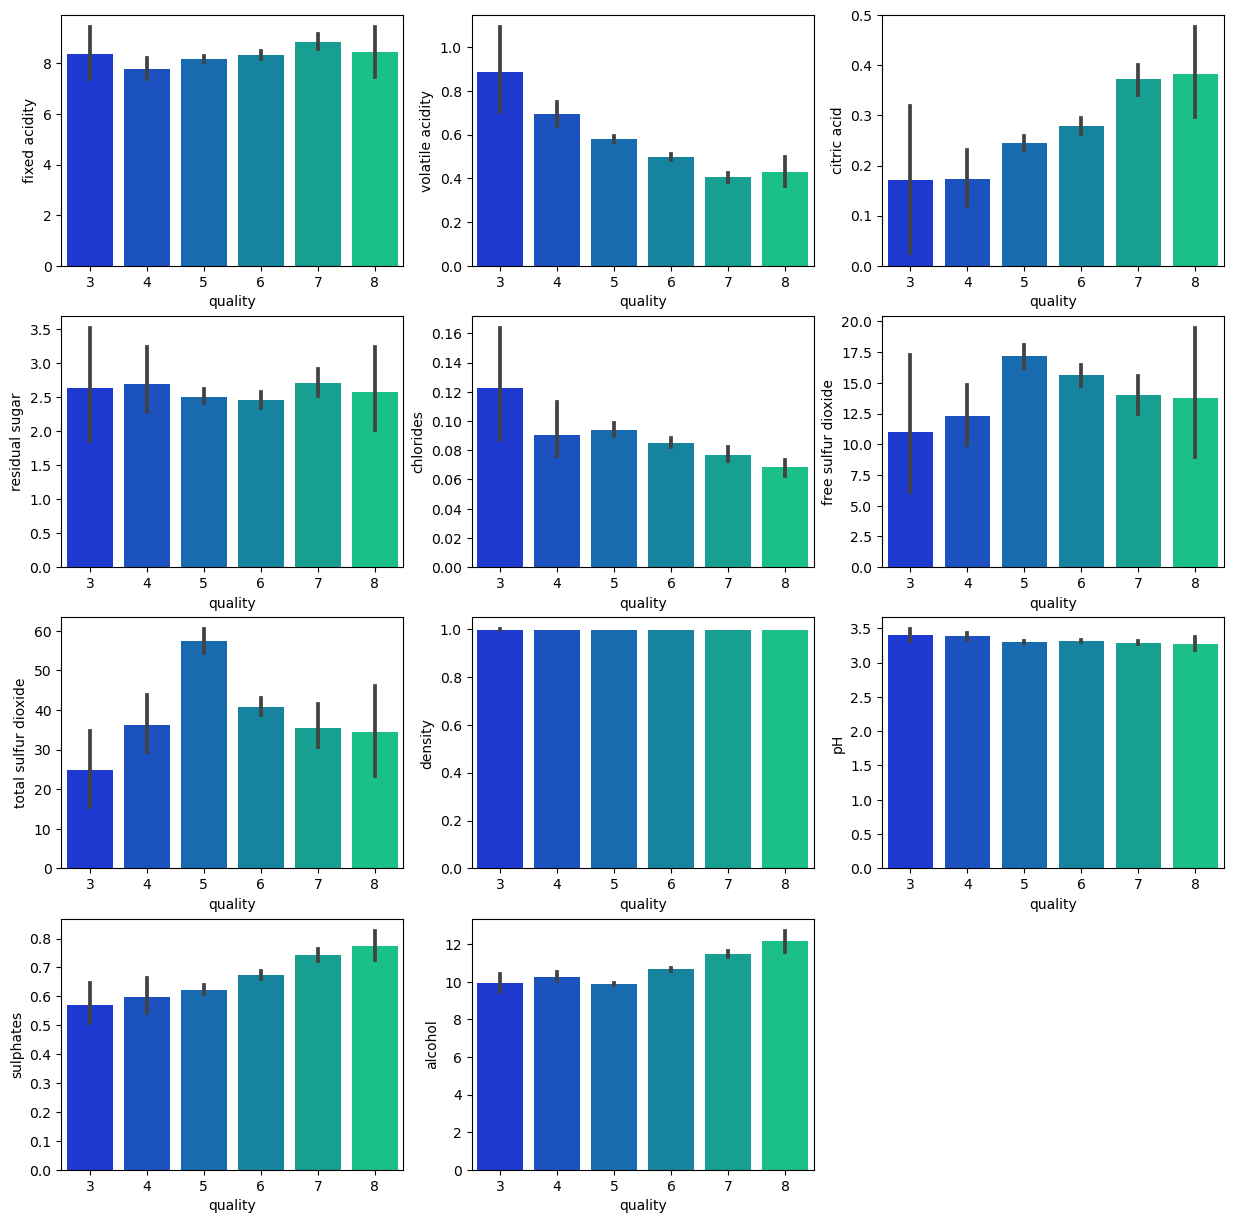

In [13]:
#Analysis of 'quality' with respect  to other features 

plt.figure(figsize=(15,15))
plt.subplot(4,3,1)
sns.barplot(x ='quality', y='fixed acidity', data = df,palette = "winter")
plt.subplot(4,3,2)
sns.barplot(x ='quality', y='volatile acidity', data = df,palette = "winter")
plt.subplot(4,3,3)
sns.barplot(x ='quality', y='citric acid', data = df,palette = "winter")
plt.subplot(4,3,4)
sns.barplot(x ='quality', y='residual sugar', data = df,palette = "winter")
plt.subplot(4,3,5)
sns.barplot(x ='quality', y='chlorides', data = df,palette = "winter")
plt.subplot(4,3,6)
sns.barplot(x ='quality', y='free sulfur dioxide', data =df,palette = "winter")
plt.subplot(4,3,7)
sns.barplot(x ='quality', y='total sulfur dioxide', data = df,palette = "winter")
plt.subplot(4,3,8)
sns.barplot(x ='quality', y='density', data = df,palette = "winter")
plt.subplot(4,3,9)
sns.barplot(x ='quality', y='pH', data = df,palette = "winter")
plt.subplot(4,3,10)
sns.barplot(x ='quality', y='sulphates', data = df,palette = "winter")
plt.subplot(4,3,11)
sns.barplot(x ='quality', y='alcohol', data = df,palette = "winter")

# Feature selection

In [44]:
# Create Classification of target
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
df['goodquality'].value_counts()

0    1175
1     184
Name: goodquality, dtype: int64

# Model Training

In [45]:
from sklearn.model_selection import train_test_split

**Splitting the dataset into training data and Test Data**

In [46]:
# Separate feature column and target column
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [47]:
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 2)

# Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

In [50]:
model.fit(x_train,y_train)

LinearRegression()

**Metrics**

In [51]:
y_predict = model.predict(x_test)

In [52]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

In [53]:
score

0.21712486213536386

In [54]:
print("Accuracy Score",score*100)

Accuracy Score 21.712486213536387


In [55]:
mae

0.2042577326485512

**Linear Regression giving poor performance. Thus I have used Logistic Regression and Random Forest Classifier**

**The wine quality dataset is a classification dataset, as it contains a categorical target variable (wine quality). Therefore, logistic regression and random forest are better suited to this dataset than linear regression.**

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()

In [58]:
model.fit(x_train,y_train)

LogisticRegression()

**Metrics**

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
y_pred = model.predict(x_test)

In [61]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 90.80882352941177


In [62]:
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)
print(classification_report(y_test,y_pred))

[[228  11]
 [ 14  19]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       239
           1       0.63      0.58      0.60        33

    accuracy                           0.91       272
   macro avg       0.79      0.76      0.78       272
weighted avg       0.90      0.91      0.91       272



**Confusion Matrix**

<Axes: >

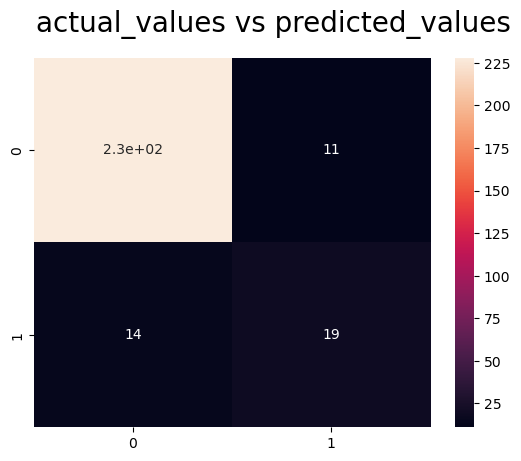

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure()
fig.suptitle('actual_values vs predicted_values', fontsize=20) 
sns.heatmap(confusion_mat, annot=True)

# RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model = RandomForestClassifier()

In [66]:
model.fit(x_train,y_train)

RandomForestClassifier()

**Metrics**

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Accuracy Score: 90.80882352941177


In [69]:
y_pred = model.predict(x_test)

In [70]:
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)
print(classification_report(y_test,y_pred))

[[223  16]
 [ 17  16]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       239
           1       0.50      0.48      0.49        33

    accuracy                           0.88       272
   macro avg       0.71      0.71      0.71       272
weighted avg       0.88      0.88      0.88       272



**Confusion Matrix**

<Axes: >

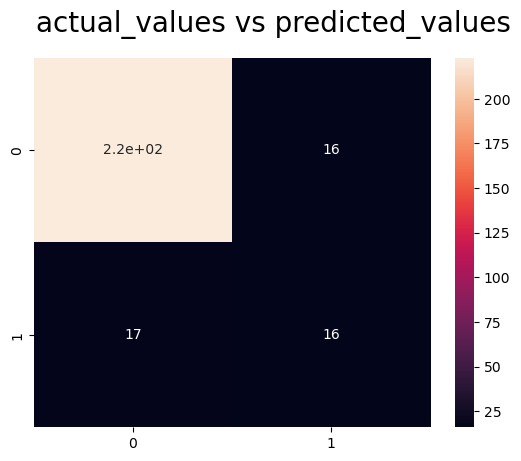

In [71]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure()
fig.suptitle('actual_values vs predicted_values', fontsize=20) 
sns.heatmap(confusion_mat, annot=True)

# Save the Model

In [72]:
import pickle

In [73]:
filename = 'Wine_model.pkl'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully.


# Test the Model

In [81]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
5             7.4              0.66         0.00             1.8      0.075   
6             7.9              0.60         0.06             1.6      0.069   
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
9             7.5              0.50         0.36             6.1      0.071   
10            6.7              0.58         0.08             1.8      0.097   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   

    alcohol  quality  goodquality  
0       9.4        5            0  
1       9.8        5            0  
2       9.8        5            0  
3       9.8        6            0  
5       9.4        5            0  
6       9.4        5            0  
7      10.0        7            1  
8       9.5        7            1  
9      10.5        5            0  
10      9.2        5            0

In [75]:
x_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1584            6.7             0.320         0.44             2.4      0.061   
1127            6.3             0.760         0.00             2.9      0.072   
77              6.8             0.785         0.00             2.4      0.104   
307            10.3             0.410         0.42             2.4      0.213   
1288            7.0             0.600         0.30             4.5      0.068   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1584                 24.0                  34.0  0.99484  3.29       0.80   
1127                 26.0                  52.0  0.99379  3.51       0.60   
77                   14.0                  30.0  0.99660  3.52       0.55   
307                   6.0                  14.0  0.99940  3.19       0.62   
1288                 20.0                 110.0  0.99914  3.30       1.17   

      alcohol  
1584     11.6  
1127     11.5  
77       10.7  
307       9.5  
1288     10.2

In [76]:
load_model = pickle.load(open(filename, 'rb'))

**Predict Quality**

**('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol')**

In [79]:
load_model.predict([[7.3, 0.65, 0.00, 1.2, 0.065, 15.0, 21.0, 0.9946, 3.39, 0.47, 10.0]])

array([1], dtype=int64)

In [82]:
ans = load_model.predict([[7.3, 0.65, 0.00, 1.2, 0.065, 15.0, 21.0, 0.9946, 3.39, 0.47, 10.0]])
if(ans==1):
    print("Good Quality Wine")
else:
    print("Not so good quality")

Good Quality Wine
